In [77]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
import os
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [78]:
# Cargamos los datos de las imagenes en el batch

def load_cifar_batches(batch_files):
    all_images = []
    all_labels = []
    for file_name in batch_files:
        with open(file_name, 'rb') as f:
            batch = pickle.load(f, encoding='latin1')
            images = batch['data']
            labels = batch['labels']
            images = images.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
            all_images.append(images)
            all_labels.extend(labels)
    return np.concatenate(all_images), np.array(all_labels)

# Asegúrate de haber subido estos archivos a Colab (a la raíz)
batch_files = ['data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5']
images, labels = load_cifar_batches(batch_files)

In [79]:
# Cargamos los nombres de clases
with open('batches.meta', 'rb') as f:
    meta = pickle.load(f, encoding='latin1')
    label_names = meta['label_names']

images = images[:10000]
labels = labels[:10000]


In [69]:
# Aplicamos el filtro para detectar los bordes de las imagenes
def apply_edge_filter(image_array):
    # Convertimos la imagen numpy a PIL
    img = Image.fromarray(image_array)
    gray = img.convert('L')  # Aplicamos la escala de grises
    edged = gray.filter(ImageFilter.FIND_EDGES)  # Se aplica el filtro de bordes
    return np.array(edged)  # Convierte de nuevo a array
# Alicamos el filtro a cada unade las imagenes
filtered_images = np.array([apply_edge_filter(img) for img in images])

In [80]:
# Procesaremos los datos
# Aplanamos las imagenes
x = filtered_images.reshape(filtered_images.shape[0], -1)
y = np.array(labels)
#Normalizaremos los datos
x = x / 255.0
# Dividimos los datos en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [81]:
#Entrenamos nuestro modelo
clf=SVC(kernel='rbf', gamma='scale')
clf.fit(x_train,y_train)
#Evaluamos
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nPrecisión del modelo: {accuracy * 100:.2f}%\n")
print("Reporte de clasificación:\n")
print(classification_report(y_test, y_pred, target_names=label_names))


Precisión del modelo: 34.30%

Reporte de clasificación:

              precision    recall  f1-score   support

    airplane       0.46      0.35      0.40       104
  automobile       0.42      0.46      0.44       114
        bird       0.28      0.35      0.31        86
         cat       0.19      0.13      0.15       100
        deer       0.27      0.32      0.29       102
         dog       0.24      0.14      0.18        93
        frog       0.28      0.42      0.33        83
       horse       0.38      0.26      0.31        97
        ship       0.47      0.47      0.47       116
       truck       0.38      0.50      0.43       105

    accuracy                           0.34      1000
   macro avg       0.34      0.34      0.33      1000
weighted avg       0.34      0.34      0.34      1000



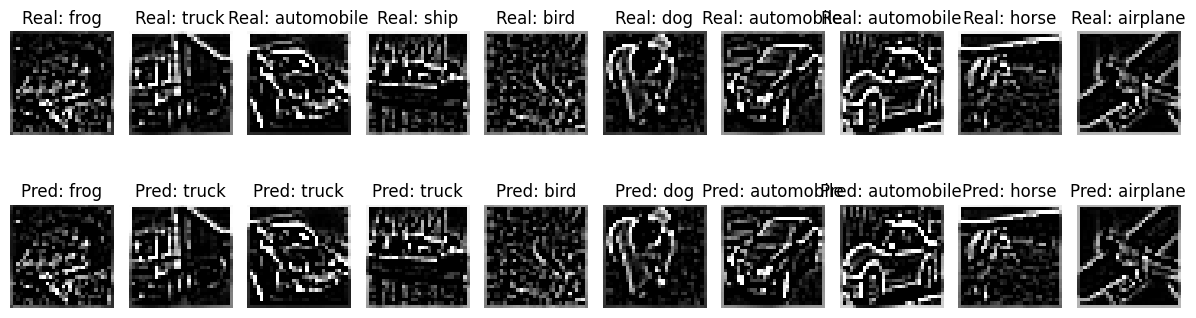

In [82]:

def show_predictions(X_test_raw, y_true, y_pred, num=10):
    plt.figure(figsize=(12, 4))
    for i in range(num):
        img = X_test_raw[i].reshape(32, 32)
        plt.subplot(2, num, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(f"Real: {label_names[y_true[i]]}")
        plt.axis('off')

        plt.subplot(2, num, i+1+num)
        plt.imshow(img, cmap='gray')
        plt.title(f"Pred: {label_names[y_pred[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualizamos los primeros ejemplos
show_predictions(x_test, y_test, y_pred)

In [73]:
# Con la escala de grises se ve una precision de modelo, algo baja, apesar de que se hicieron algunos cambios con respecto
# al modelo ya que se utilizo rbf en lugar de un modelo lineal.
# Cambiaremos las imagenes, manteniendo su color original.

# Aplicamos el filtro RGB
def apply_edge_filter_rgb(image_array):
    # Convertimos la imagen numpy a PIL
    img = Image.fromarray(image_array)
    r, g, b = img.split()
    r_filtered = r.filter(ImageFilter.FIND_EDGES)
    g_filtered = g.filter(ImageFilter.FIND_EDGES)
    b_filtered = b.filter(ImageFilter.FIND_EDGES)
    filtered_img = Image.merge("RGB", (r_filtered, g_filtered, b_filtered))
    return np.array(filtered_img)
# Aplicamos el filtro a cada una de las imagenes
filtered_images_rgb = np.array([apply_edge_filter_rgb(img) for img in images])

In [83]:
# Procesamiento del filtro en las imagenes

# Aplanamos las imagenes
x = filtered_images_rgb.reshape(len(filtered_images_rgb), -1)/255.0
y = np.array(labels)

# Dividimos a los datos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [84]:
# Entrenamos el modelo con RandomForest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(x_train, y_train)

# Evaluamos el modelo
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nPrecisión del modelo: {accuracy * 100:.2f}%\n")
print("Reporte de clasificación:\n")
print(classification_report(y_test, y_pred, target_names=label_names))


Precisión del modelo: 32.80%

Reporte de clasificación:

              precision    recall  f1-score   support

    airplane       0.37      0.42      0.40       104
  automobile       0.45      0.25      0.33       114
        bird       0.18      0.17      0.18        86
         cat       0.27      0.25      0.26       100
        deer       0.28      0.31      0.30       102
         dog       0.20      0.14      0.17        93
        frog       0.24      0.40      0.30        83
       horse       0.39      0.26      0.31        97
        ship       0.46      0.53      0.49       116
       truck       0.39      0.49      0.43       105

    accuracy                           0.33      1000
   macro avg       0.32      0.32      0.32      1000
weighted avg       0.33      0.33      0.32      1000



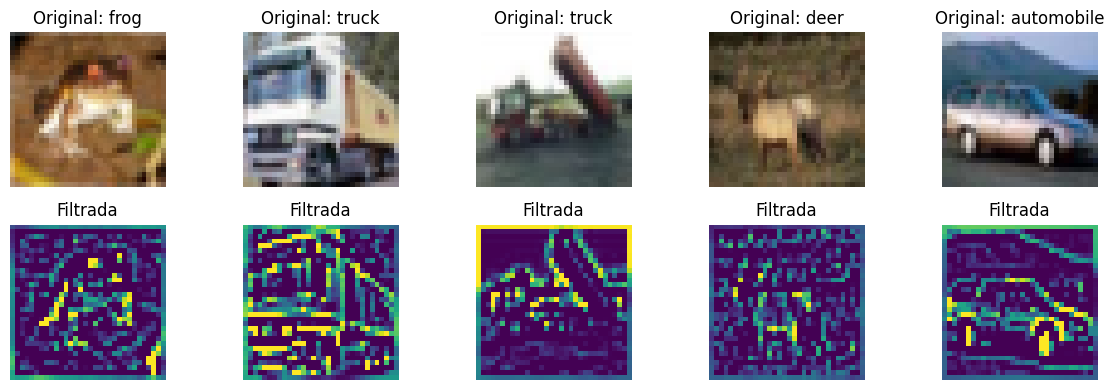

In [76]:
# Visualizamos la imagenes originales y las filtradas
def mostrar_comparacion(originales, filtradas, etiquetas, num=5):
    plt.figure(figsize=(12, 4))
    for i in range(num):
        # Imagen original
        plt.subplot(2, num, i+1)
        plt.imshow(originales[i])
        plt.title(f"Original: {label_names[etiquetas[i]]}")
        plt.axis('off')

        # Imagen con filtro
        plt.subplot(2, num, i+1+num)
        plt.imshow(filtradas[i])
        plt.title("Filtrada")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

mostrar_comparacion(images, filtered_images, labels)

Aplicando filtro de bordes a todas las imágenes...
Entrenando el modelo con imágenes filtradas...
Epoch 1/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 79s 137ms/step - accuracy: 0.3021 - loss: 1.8898 - val_accuracy: 0.5278 - val_loss: 1.3531
Epoch 2/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 75s 133ms/step - accuracy: 0.5661 - loss: 1.2292 - val_accuracy: 0.6518 - val_loss: 1.0124
Epoch 3/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 81s 131ms/step - accuracy: 0.6401 - loss: 1.0344 - val_accuracy: 0.6908 - val_loss: 0.9012
Epoch 4/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 80s 128ms/step - accuracy: 0.6813 - loss: 0.9202 - val_accuracy: 0.6830 - val_loss: 0.9016
Epoch 5/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 83s 131ms/step - accuracy: 0.7146 - loss: 0.8253 - val_accuracy: 0.7065 - val_loss: 0.8479
Epoch 6/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 73s 130ms/step - accuracy: 0.7396 - loss: 0.7392 - val_accuracy: 0.7140 - val_loss: 0.8217
Epoch 7/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 72s 128ms/step - accuracy: 0.7600 - loss: 0.6822 - val_accuracy: 0.7175 - va

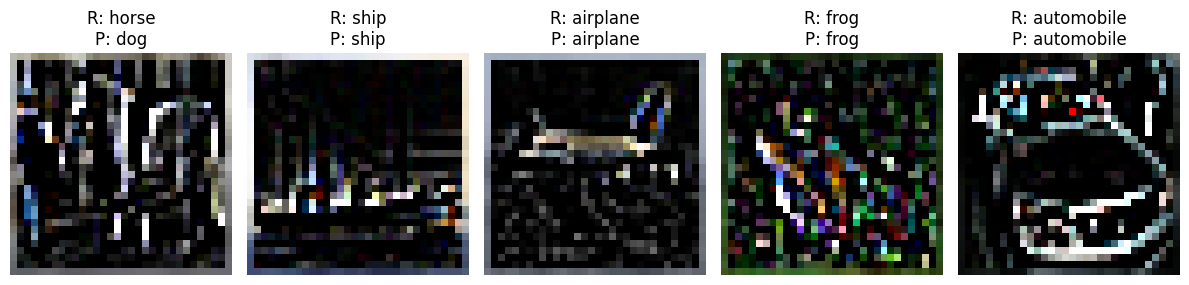

In [87]:
# Evaluaremos ahora el mismo filtro pero utilizando redes neuronales, para tener una mejor
# porcentaje de precision

import pickle
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Cargamos los datos de los data_batch

def load_cifar_batches(batch_files):
    all_images = []
    all_labels = []
    for file_name in batch_files:
        with open(file_name, 'rb') as f:
            batch = pickle.load(f, encoding='latin1')
            images = batch['data']
            labels = batch['labels']
            images = images.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
            all_images.append(images)
            all_labels.extend(labels)
    return np.concatenate(all_images), np.array(all_labels)

batch_files = ['data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5']
images, labels = load_cifar_batches(batch_files)

with open('batches.meta', 'rb') as f:
    meta = pickle.load(f, encoding='latin1')
    label_names = meta['label_names']


# Aplicamos el filtro de bordes por canal RGB

def apply_edge_filter_color(image_array):
    img = Image.fromarray(image_array)
    r, g, b = img.split()
    r_filtered = r.filter(ImageFilter.FIND_EDGES)
    g_filtered = g.filter(ImageFilter.FIND_EDGES)
    b_filtered = b.filter(ImageFilter.FIND_EDGES)
    filtered_img = Image.merge("RGB", (r_filtered, g_filtered, b_filtered))
    return np.array(filtered_img)

print("Aplicando filtro de bordes a todas las imágenes...")
filtered_images = np.array([apply_edge_filter_color(img) for img in images])

#Normalizamos y prepararamos los datos

X = filtered_images.astype('float32') / 255.0
y = to_categorical(labels, num_classes=10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definimos el modelo de red convolucional para desarrollar una mejor presición.

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Compilamos y entrenamos al modelo


model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("Entrenando el modelo con imágenes filtradas...")
history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_split=0.1)

# Evaluamos el desempeño

loss, acc = model.evaluate(X_test, y_test)
print(f"\n Precisión en test (con filtro): {acc * 100:.2f}%")


# Imprimimos las predicciones del modelo de las imagenes

def mostrar_predicciones(model, X, y_true, label_names, num=5):
    y_pred = model.predict(X[:num])
    pred_labels = np.argmax(y_pred, axis=1)
    true_labels = np.argmax(y_true[:num], axis=1)

    plt.figure(figsize=(12, 3))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.imshow((X[i] * 255).astype(np.uint8))
        plt.title(f"R: {label_names[true_labels[i]]}\nP: {label_names[pred_labels[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

mostrar_predicciones(model, X_test, y_test, label_names)
